## Use cluster analysis to identify the groups of characteristically similar schools in the College Scorecard dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir('/home/admin1/PycharmProjects/Clustering datasets')

# reading dataset & storing it as pandas dataframe
college_data = pd.read_csv('CollegeScorecard.csv')
college_data.head()

/home/admin1/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (7,9,1427,1542,1561,1575) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,AccredAgency,INSTURL,NPCURL,...,COMPL_RPY_3YR_RT_SUPP,NONCOM_RPY_3YR_RT_SUPP,DEP_RPY_3YR_RT_SUPP,IND_RPY_3YR_RT_SUPP,PELL_RPY_3YR_RT_SUPP,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,galileo.aamu.edu/netpricecalculator/npcalc.htm,...,0.578873239,0.373790022,0.442857143,0.45890411,0.443586698,0.452513966,0.484818805,0.406,0.423580786,0.44245283
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,www.collegeportraits.org/AL/UAB/estimator/agree,...,0.847800926,0.678748759,0.767798013,0.739164697,0.732297853,0.795454545,0.760521886,0.755344418,0.751552795,0.765074771
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,tcc.noellevitz.com/(S(miwoihs5stz5cpyifh4nczu0...,...,0.807692308,0.61328125,PrivacySuppressed,0.641114983,0.600877193,0.775,0.610465116,0.686567164,0.632653061,0.65
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.892045455,0.689788054,0.800347222,0.75564409,0.738341969,0.851405622,0.768378651,0.79844098,0.778156997,0.791666667
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/email/index.aspx,www.alasu.edu/cost-aid/forms/calculator/index....,...,0.482490272,0.315996848,0.32410212,0.350993377,0.320016821,0.380829016,0.364423718,0.286530612,0.315737052,0.334633385


#### Taking only 5 relevant columns

In [2]:
data = college_data.loc[:,['PREDDEG','HIGHDEG','CONTROL','TUITIONFEE_IN','PCTFLOAN']]

In [3]:
data = data[:2000]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
PREDDEG          2000 non-null int64
HIGHDEG          2000 non-null int64
CONTROL          2000 non-null int64
TUITIONFEE_IN    1399 non-null float64
PCTFLOAN         1893 non-null float64
dtypes: float64(2), int64(3)
memory usage: 78.2 KB


In [5]:
data['TUITIONFEE_IN'].fillna(data['TUITIONFEE_IN'].mean(), inplace= True)
data['PCTFLOAN'].fillna(data['PCTFLOAN'].mean(), inplace= True)

In [6]:
college_data = None

In [7]:
data.describe()

,PREDDEG,HIGHDEG,CONTROL,TUITIONFEE_IN,PCTFLOAN
count,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,2.17250,2.682000,1.903500,14255.908506,0.490982
std,0.94773,1.182614,0.804681,10413.755901,0.267753
min,0.00000,0.000000,1.000000,80.000000,0.000000
25%,1.00000,2.000000,1.000000,5785.750000,0.322825
50%,2.00000,3.000000,2.000000,14255.908506,0.523750
75%,3.00000,4.000000,3.000000,15983.750000,0.697650
max,4.00000,4.000000,3.000000,47514.000000,1.000000


In [8]:
x_values = data.values

In [9]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_values = sc_x.fit_transform(x_values)

### Finding optimal clusters using elbow method

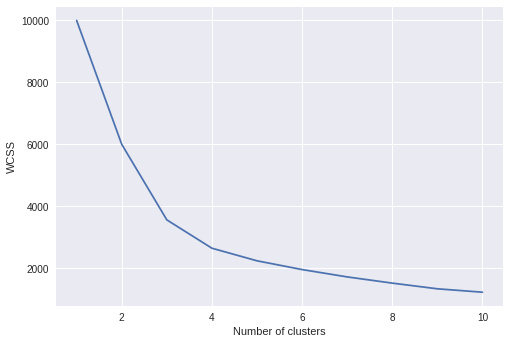

In [10]:
from sklearn.cluster import KMeans

wcss = []
for num in range(1,11):
    kmeans = KMeans(n_clusters=num, init='k-means++',max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x_values)
    wcss.append(kmeans.inertia_)

plt.style.use('seaborn')
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### Optimal number of clusters is 4

### Building KMeans clustering model

In [11]:
total_clusters = 4
kmeans = KMeans(n_clusters=total_clusters, init='k-means++',max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x_values)

#### Total records in each cluster

In [12]:
for num in range(total_clusters):
    print(f'Number of colleges in Cluster {num + 1}: {len(y_kmeans[y_kmeans==num])}')

Number of colleges in Cluster 1: 445
Number of colleges in Cluster 2: 532
Number of colleges in Cluster 3: 532
Number of colleges in Cluster 4: 491
